In [12]:
import pandas as pd
import numpy as np
import keras
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Activation, Flatten
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
import matplotlib.pyplot as plt

## Importing Database

In [13]:
from keras.datasets import cifar10

In [14]:
# declaring parameters
batch_size=32
num_classes=10
epochs=50

In [15]:
# splitting the dataset into train and test
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(y_train.shape,x_train.shape)
print(y_test.shape,x_test.shape)

(50000, 1) (50000, 32, 32, 3)
(10000, 1) (10000, 32, 32, 3)


In [16]:
# converting class vectors to binary class matrices
from keras.utils import np_utils
y_train=keras.utils.np_utils.to_categorical(y_train)
y_test=keras.utils.np_utils.to_categorical(y_test)

In [17]:
print(y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Building the model

In [18]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

In [19]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_8 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_9 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 batch_normalization_7 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                      

In [20]:
#compiling
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
#converting to float
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

#normalizing
x_train/=255
x_test/=255

In [21]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 32s 20ms/step - loss: 5.5265 - accuracy: 0.3837 - val_loss: 4.3903 - val_accuracy: 0.4095
Epoch 2/50
1563/1563 [==============================] - 30s 19ms/step - loss: 3.3558 - accuracy: 0.5194 - val_loss: 2.7163 - val_accuracy: 0.5540
Epoch 3/50
1563/1563 [==============================] - 29s 19ms/step - loss: 2.2571 - accuracy: 0.5873 - val_loss: 1.8435 - val_accuracy: 0.6294
Epoch 4/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.6473 - accuracy: 0.6331 - val_loss: 1.4937 - val_accuracy: 0.6321
Epoch 5/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.3045 - accuracy: 0.6642 - val_loss: 1.1644 - val_accuracy: 0.6820
Epoch 6/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0991 - accuracy: 0.6866 - val_loss: 0.9951 - val_accuracy: 0.7090
Epoch 7/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9767 - accuracy: 0.7088 - val_loss: 0.9244 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


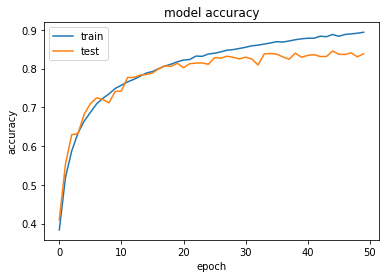

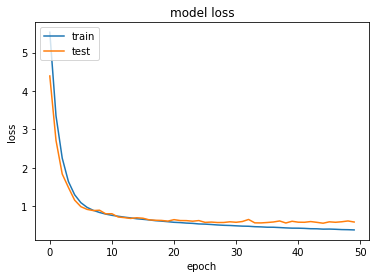

In [23]:
print(history.history.keys())
# summerize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()